In [ ]:
# ftp://ftp.sas.com/pub/neural/dojo/dojo.html
# stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

In [202]:
from __future__ import absolute_import, division, print_function, unicode_literals
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers, models

In [203]:
# first neural network with keras tutorial
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# load the dataset
dataset = pd.read_csv("C:/Users/Zz240/Desktop/Big Data & ML/data_cleaned.csv")
# split into input (X) and output (y) variables
train_dataset = dataset.sample(frac=0.85,random_state=1)
test_dataset = dataset.drop(train_dataset.index)

In [204]:
train_stats = train_dataset.describe()
train_stats.pop("Price")
train_stats = train_stats.transpose()

In [205]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [206]:
del normed_train_data['Price']
normed_train_data

,Bathroom,BuildingArea,Car,Distance,Landsize,Rooms,Type1,Type2,Type3,YearBuilt
717,-0.918978,-0.220764,-0.731325,0.030834,1.110986,-0.252134,0.448122,-0.2916,-0.312294,-0.270775
2857,0.467539,0.932341,0.307658,0.616608,-0.098232,0.927652,0.448122,-0.2916,-0.312294,1.291137
5032,0.467539,0.186900,0.307658,-1.408496,-1.519516,-0.252134,0.448122,-0.2916,-0.312294,1.009481
2181,-0.918978,-0.616780,0.307658,0.298616,0.398089,-0.252134,0.448122,-0.2916,-0.312294,0.497379
4359,0.467539,-0.127583,-0.731325,-1.291341,-1.167579,-0.252134,0.448122,-0.2916,-0.312294,-1.551031
...,...,...,...,...,...,...,...,...,...,...
2802,-0.918978,-0.803140,1.346640,-0.538203,-0.057624,-1.431920,-2.231037,-0.2916,3.201401,-0.526826
3089,-0.918978,-0.814788,-0.731325,-0.370839,-0.314809,-1.431920,0.448122,-0.2916,-0.312294,-0.142749
4806,-0.918978,-0.838083,0.307658,-1.575860,-1.402203,-1.431920,0.448122,-0.2916,-0.312294,-2.063133
4721,0.467539,-0.605132,-0.731325,0.114516,-1.352571,-0.252134,0.448122,-0.2916,-0.312294,1.035086


In [207]:
del normed_test_data['Price']
normed_test_data

,Bathroom,BuildingArea,Car,Distance,Landsize,Rooms,Type1,Type2,Type3,YearBuilt
14,0.467539,-0.162526,0.307658,5.838363,2.293133,0.927652,0.448122,-0.291600,-0.312294,0.497379
15,0.467539,1.701078,6.541550,0.332089,2.288621,0.927652,0.448122,-0.291600,-0.312294,-0.654852
18,0.467539,-0.127583,0.307658,-0.220212,2.279597,-0.252134,0.448122,-0.291600,-0.312294,0.625404
20,0.467539,-0.104288,-0.731325,4.097778,2.266061,-0.252134,0.448122,-0.291600,-0.312294,0.907061
31,0.467539,-0.185821,-0.731325,0.465980,2.220941,-0.252134,0.448122,-0.291600,-0.312294,0.241327
...,...,...,...,...,...,...,...,...,...,...
5250,-0.918978,-0.733255,-0.731325,-0.538203,-1.659388,-0.252134,-2.231037,-0.291600,3.201401,0.394958
5253,-0.918978,-1.140918,-1.770307,-1.542387,-1.663900,-1.431920,0.448122,-0.291600,-0.312294,-2.063133
5259,0.467539,-0.605132,0.307658,-1.542387,-1.668412,-0.252134,-2.231037,3.428587,-0.312294,-1.551031
5264,-0.918978,-0.849730,-0.731325,-0.973350,-1.668412,-1.431920,0.448122,-0.291600,-0.312294,0.241327


In [208]:
train_labels = train_dataset.pop('Price')
test_labels = test_dataset.pop('Price')

In [209]:
train_X = normed_train_data
train_y = train_labels
test_X = normed_test_data
test_y = test_labels

model = Sequential()
model.add(Dense(16, input_dim=10, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse',
optimizer=keras.optimizers.RMSprop(0.005), metrics=['mae', 'mse'])
history = model.fit(train_X, train_y, epochs=1000, batch_size=16, validation_split = 0.2)
_,_, MSE = model.evaluate(train_X, train_y)
print('RMSE: %.2f' % (np.sqrt(MSE)))

In [194]:
from sklearn.model_selection import train_test_split
# random train-validation split
X_Training, X_Validation, Y_Training, Y_Validation = train_test_split(train_X,train_y,test_size=0.2) # before model bui
# define the keras model
model = Sequential()
model.add(Dense(16, input_dim=10, activation='relu'))
# model.add(Dense(8, activation='relu'))
model.add(Dense(1))
# compile the keras model
# keras.optimizers.RMSprop(0.05)
model.compile(loss='mse',
                optimizer=keras.optimizers.RMSprop(0.005),
                metrics=['mae', 'mse'])
# fit the keras model on the dataset
history = model.fit(X_Training, Y_Training, epochs=1000, batch_size=16, validation_data=(X_Validation,Y_Validation))

# evaluate the keras model
_,_, MSE = model.evaluate(train_X, train_y)
print('RMSE: %.2f' % (np.sqrt(MSE)))

Epoch 1/1000
224/224 [==============================] - 0s 840us/step - loss: 1778539823104.0000 - mae: 1170400.7500 - mse: 1778539823104.0000 - val_loss: 1810300665856.0000 - val_mae: 1168846.1250 - val_mse: 1810300665856.0000
Epoch 2/1000
224/224 [==============================] - 0s 512us/step - loss: 1778382929920.0000 - mae: 1170338.6250 - mse: 1778382929920.0000 - val_loss: 1810075615232.0000 - val_mae: 1168758.0000 - val_mse: 1810075615232.0000
Epoch 3/1000
224/224 [==============================] - 0s 514us/step - loss: 1778082119680.0000 - mae: 1170222.7500 - mse: 1778082119680.0000 - val_loss: 1809704681472.0000 - val_mae: 1168615.1250 - val_mse: 1809704681472.0000
Epoch 4/1000
224/224 [==============================] - 0s 508us/step - loss: 1777647616000.0000 - mae: 1170054.2500 - mse: 1777647616000.0000 - val_loss: 1809198612480.0000 - val_mae: 1168421.6250 - val_mse: 1809198612480.0000
Epoch 5/1000
224/224 [==============================] - 0s 495us/step - loss: 1777059102

In [195]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.069227e+11,301941.75000,2.069227e+11,2.070471e+11,304774.03125,2.070471e+11,995
996,2.069384e+11,301961.43750,2.069384e+11,2.070273e+11,304747.40625,2.070273e+11,996
997,2.068867e+11,301894.40625,2.068867e+11,2.070023e+11,304730.00000,2.070023e+11,997
998,2.068832e+11,301906.53125,2.068832e+11,2.069798e+11,304692.46875,2.069798e+11,998
999,2.068703e+11,301861.43750,2.068703e+11,2.069520e+11,304664.53125,2.069520e+11,999


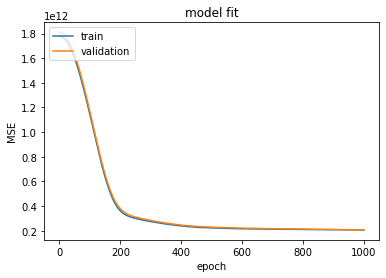

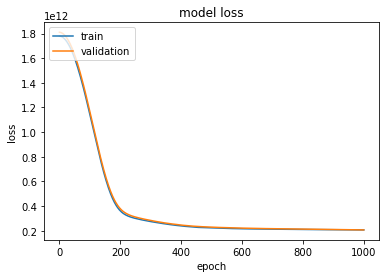

In [196]:
# summarize history for accuracy
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model fit')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [210]:
test_predictions = model.predict(test_X)

In [294]:
np.size(test_predictions)

790

In [275]:
np.array(test_labels)[1]

1000000

In [290]:
error = []
error_squared = []
for i in range(np.size(test_predictions)):
    error.append(test_predictions[i][0] - np.array(test_labels)[i])
    error_squared.append(np.square(test_predictions[i][0] - np.array(test_labels)[i]))
error_squared

[3161496614.1601562,
 1168655319153.1406,
 12800461605.765625,
 12555636697.503906,
 28714319209.0,
 371759697841.0,
 1542833215245.1406,
 440588455650.1406,
 321273292695.0625,
 103108099920.25,
 15058787153.0625,
 237948230250.39062,
 6384789048.765625,
 98128107672.7539,
 13343339803.890625,
 114971686087.5625,
 25342888830.25,
 92933065225.5625,
 162273015976.5625,
 92189013548.9414,
 82441483439.0625,
 92660273202.25,
 58859187533.265625,
 1581374784492.5625,
 202098686527.51562,
 4591180443.0625,
 10949032565.640625,
 49486171411.265625,
 657443464533.7656,
 213462249390.0625,
 4478018724.0,
 2684347339.2226562,
 8627414235.015625,
 1141875505103.0625,
 48066616081.0,
 23843142950.0625,
 65390512833.59766,
 152928168012.59766,
 14312742587.015625,
 24975006.25,
 768846631921.0,
 215060468452.51562,
 673961775828.0625,
 3172885830.140625,
 97149798954.39062,
 467831718315.0625,
 256799996581.64062,
 378204551526.3906,
 47492885594.390625,
 8555637198.472656,
 443718019292.6406,
 6

In [296]:
RMSE = np.sqrt(np.sum(error_squared)/np.size(test_predictions))
RMSE

442597.4585394506

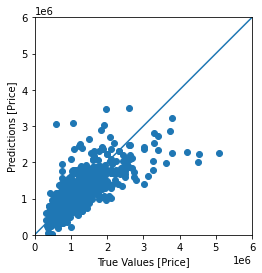

In [298]:
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Price]')
plt.ylabel('Predictions [Price]')
lims = [0, 6e+06]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

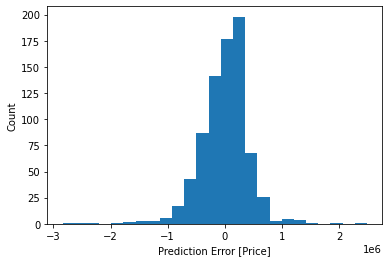

In [299]:
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Price]")
_ = plt.ylabel("Count")